# 6. 代表的な離散確率分布
## 指標の推定方法
- パラメトリックな手法：母集団の確率分布に仮定をおく物
- ノンパラメトリックな手法：仮定を置かない物

本書では**パラメトリックな手法**を紹介する.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from stats_package.modules import *

%precision 3
%matplotlib inline

### 6.1 ベルヌーイ分布
取りうる値(x)が0,1の確率分布

$$
f(x)=
\begin{cases}
    p^x(1-p)^{(1-x)} & (x \in {0,1}) \\
    0 & (otherwise)
  \end{cases}
$$

1が出る確率を$p$,  0が出る確率を$1-p$とする.  この分布においてはpが唯一の分布の形を調整できるパラメタである. 


例. サイコロを投げて6が**出るか否か**

6が出ない確率

$$
P(X=0)=(1/6)^0 (1-1/6)^{(1-0)} = 5/6
$$

#### ベルヌーイ分布の期待値と分散
期待値と分散の式にベルヌーイの確率分布を代入すると以下のように求められる


$X \sim Bern(p)とする$
$$
E(X)=p, V(X)=p(1-p)
$$

In [2]:
def Bern(p):
    """
    指定した確率pによって分布の決まるBern分布と要素を返す
    """
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [3]:
p = 0.3
X = Bern(p)

期待値はそのまま0.3, 分散は0.3 × 0.7 = 0.21になる. 

In [21]:
check_prob(X)

期待値は3.0
分散は2.1


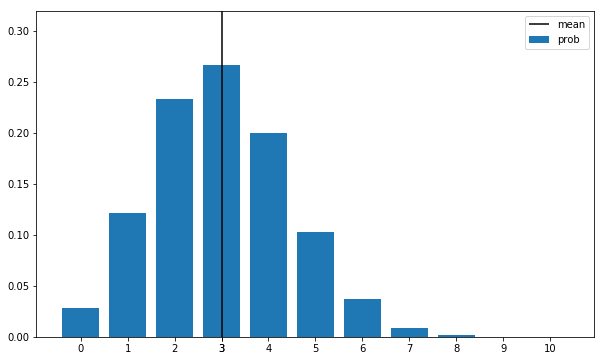

In [22]:
plot_prob(X)

In [11]:
# scipy.statsを使った実装を見ていく. 組み込みの関数あり確率分布rvを返す. 
rv = stats.bernoulli(p)
# pmfメソッドで確率関数の計算, rv->random variable

In [12]:
rv.pmf(0), rv.pmf(1)

(0.7000000000000001, 0.3)

In [13]:
# pmfはリストを渡すこともできる
rv.pmf([0,1])

array([0.7, 0.3])

In [14]:
# cdfで累積密度関数
rv.cdf([0,1])

array([0.7, 1. ])

In [15]:
# 平均や分散もメソッドで求めることもできる
rv.mean(), rv.var()

(0.3, 0.21)

### 6.2 二項分布
ベルヌーイ試行をn回行った時の成功回数をが従う分布. 
成功回数は0~n回まであるので取りうる値は{0,1,2,3,4,...,n}である. 

パラメタは成功確率pと試行回数のn
$Bin(n, p)$の確率関数は次のようになる.

$$
f(x)=
\begin{cases}
    {}_n C _xp^x(1-p)^{(n-x)} & (x \in {0,1,...,n}) \\
    0 & (otherwise)
  \end{cases}
$$

高校の数学でやったね.

#### 二項分布の期待値と分散
基本ベルヌーイの確率分布の期待値と分散に試行回数nをかけたものとなる. 


$X \sim Bin(p)とする$
$$
E(X)=np, V(X)=np(1-p)
$$

二項分布をnumpyとscipy statで実装していく  
${}_n C _x$の計算はscipy.specialにあるcomb関数を用いる

In [16]:
from scipy.special import comb

In [18]:
def Bin(n, p):
    '''
    試行回数n, 成功確率pである二項分布の要素, 確率関数返す
    '''
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [27]:
n=10
p=0.3

In [19]:
X = Bin(n, p)

In [23]:
check_prob(X)

期待値は3.0
分散は2.1


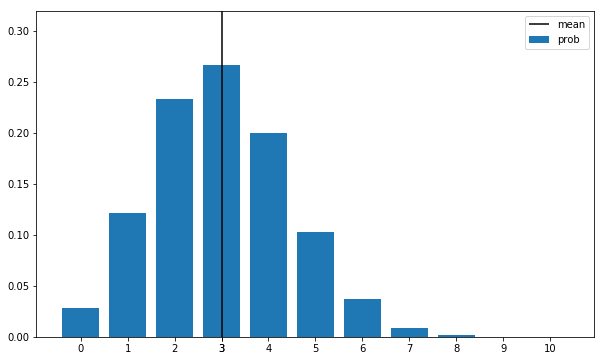

In [24]:
plot_prob(X)

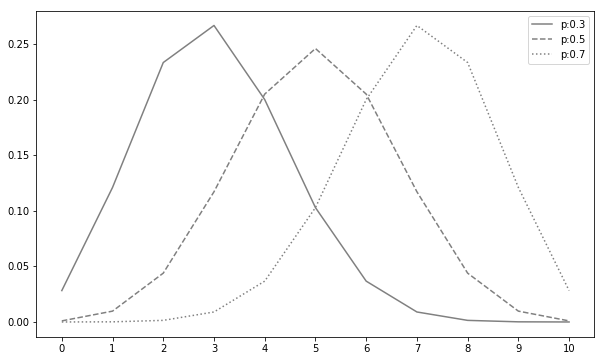

In [28]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f"p:{p}", ls=ls, color="gray")

ax.set_xticks(x_set)
ax.legend()
plt.show()
# それぞれの確率によってピークが異なる

### 6.3 幾何分布
ベルヌーイ試行を繰り返し初めて成功する試行回数が従う確率分布,  
取りうる値は{1,2,3,...}となる, パラメタは成功確率p

今回パラメタpの幾何分布をGe(p)と表記する.
確率関数は以下のよう

$$
f(x)=
\begin{cases}
    (1-p)^{(x-1)}p & (x \in {0,1,2,3,...,}) \\
    0 & (otherwise)
  \end{cases}
$$

#### 幾何分布の期待値と分散
基本ベルヌーイの確率分布の期待値と分散に試行回数nをかけたものとなる. 


$X \sim Ge(p)とする$
$$
E(X)=1/p, V(X)=(1-p)/p^2
$$

導出は[こちら](https://mathtrain.jp/kikabunpu)

In [30]:
def Ge(p):
    """
    成功確率をpとする幾何分布の確率関数と要素を返す
    """
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return p*(1-p)**(x-1)
        else:
            return 0
    return x_set, f

In [33]:
p = 0.5
X = Ge(p)

In [34]:
check_prob(X)

期待値は2.0
分散は2.0


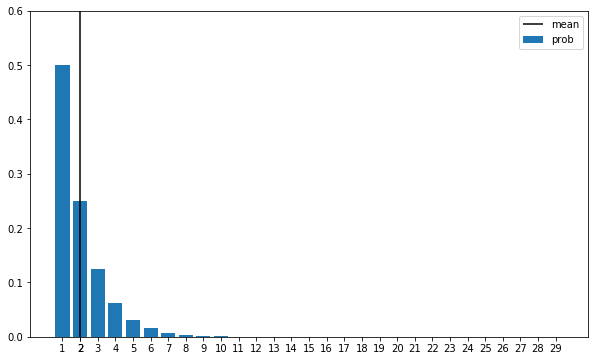

In [35]:
plot_prob(X)

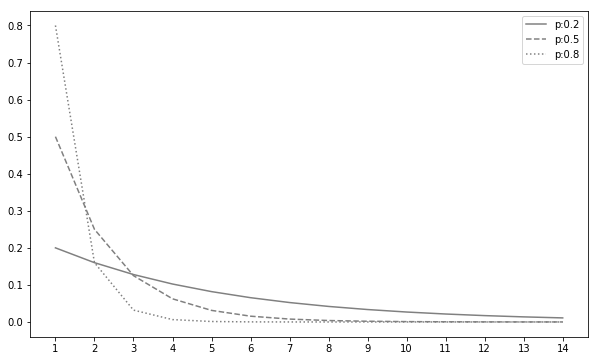

In [37]:
# scipy.statsではgeom関数を用いる
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

x_set = np.arange(1,15)
for p, ls in zip([0.2,0.5,0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
           label=f"p:{p}", ls=ls, color="gray")

ax.set_xticks(x_set)
ax.legend()

plt.show()

### 6.4 ポアソン分布
ランダムな事象が単位時間あたりに発生する件数が従う確率分布.  
発生する件数の確率変数:{0,1,2,...}, パラメタはλ>0.

ポアソン分布をPoi(λ)と表記する.  
確率関数は次の式のようになる.  

$$
f(x)=
\begin{cases}
    \frac{\lambda^x}{x!} \cdot e^{-\lambda} & (x \in {0,1,2,3,...}) \\
    0 & (otherwise)
  \end{cases}
$$

これは想像しにくいので例をあげる.  

例. 1時間あたり平均10アクセスあるサイトへの, 1時間あたりのアクセス件数  
これはアクセスを完全にランダムな事象として捉えている, 単位時間あたりのアクセス件数はPoi(10)に従う.  
ここで単位時間にちょうど15件のアクセスがある確率であれば

$$
P(X=15)=\frac{10^{15}}{15!} \cdot e^{-10} \simeq 0.035
$$

#### ポアソン分布の期待値と分散
基本ベルヌーイの確率分布の期待値と分散に試行回数nをかけたものとなる. 


$X \sim Poi(\lambda)とする$
$$
E(X)=\lambda, V(X)=\lambda
$$

導出は[こちら](https://ai-trend.jp/basic-study/poisson-distribution/p-parameter-derivation/)

In [38]:
from scipy.special import factorial

def Poi(lam):
    """
    lamをパラメーターに持つポワソン分布の要素と確率関数を返す
    """
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0 
    return x_set, f

In [39]:
lam = 3
X = Poi(lam)

In [40]:
check_prob(X)

期待値は3.0
分散は3.0


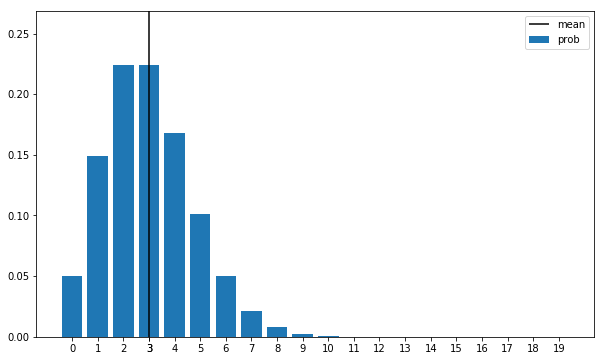

In [41]:
plot_prob(X)

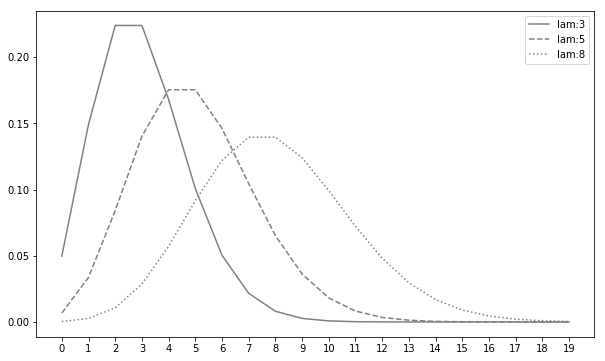

In [43]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3,5,8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
           label=f"lam:{lam}", ls=ls, color="gray")
ax.set_xticks(x_set)
ax.legend()

plt.show()
# どのパラメタでもピークはλにあり, λが大きくなるにつれ裾野が広くなっている.